In [43]:
import pandas as pd
from shapely.geometry import box
import geopandas as gpd
import numpy as np
import earthaccess
import os

## Read and Retrive infromation from KMZ file

In [27]:
import importlib
import tools
# Reload the tools module to apply changes
importlib.reload(tools)

<module 'tools' from 'c:\\Users\\farukgurbuz\\Desktop\\ProjectStore\\SWOT-analysis\\tools.py'>

In [28]:
path = r'data/swot_science_coverage_20240319.kmz'
kmz_file = path
kmz_data = tools.read_kmz(kmz_file)
gdf = tools.parse_kmz(kmz_data, filter_types='polygon')

In [30]:
gdf.head()

,name,description,geometry
0,001_164L,"<html>\n <head>\n <style type=""text/...","POLYGON Z ((0.92456 5.15371 0.00000, 1.00903 5..."
1,001_164R,"<html>\n <head>\n <style type=""text/...","POLYGON Z ((0.92456 5.15371 0.00000, 1.00903 5..."
2,001_165L,"<html>\n <head>\n <style type=""text/...","POLYGON Z ((1.00903 5.72623 0.00000, 1.09376 6..."
3,001_165R,"<html>\n <head>\n <style type=""text/...","POLYGON Z ((1.00903 5.72623 0.00000, 1.09376 6..."
4,001_166L,"<html>\n <head>\n <style type=""text/...","POLYGON Z ((1.09376 6.29871 0.00000, 1.17876 6..."


In [33]:

shapefile_path = 'data/dam_poly.shp'
filtered_gdf_shapefile = tools.filter_geodataframe(gdf, shapefile_path=shapefile_path)
filtered_gdf_shapefile.loc[:, 'Parsed_HTML'] = filtered_gdf_shapefile['description'].apply(tools.extract_links_from_html)

# # Process the dataframe to extract pass and scene numbers
filtered_gdf_shapefile = tools.process_dataframe(filtered_gdf_shapefile)


In [34]:
filtered_gdf_shapefile


,name,geometry,Parsed_HTML,pass_number,scene_number
27579,178_089R,"POLYGON Z ((41.95634 37.60173 0.00000, 42.1119...",{'L1B_HR_SLC': ['https://search.earthdata.nasa...,178,045F
29689,193_220R,"POLYGON Z ((41.46736 37.03861 0.00000, 41.6229...",{'L1B_HR_SLC': ['https://search.earthdata.nasa...,193,110F
75698,484_089L,"POLYGON Z ((40.72347 37.60173 0.00000, 40.8790...",{'L1B_HR_SLC': ['https://search.earthdata.nasa...,484,045F
27577,178_088R,"POLYGON Z ((41.79777 38.16447 0.00000, 41.9563...",{'L1B_HR_SLC': ['https://search.earthdata.nasa...,178,044F
77823,499_221R,"POLYGON Z ((40.39006 37.60173 0.00000, 40.5486...",{'L1B_HR_SLC': ['https://search.earthdata.nasa...,499,111F
29691,193_221R,"POLYGON Z ((41.62294 37.60173 0.00000, 41.7815...",{'L1B_HR_SLC': ['https://search.earthdata.nasa...,193,111F
75696,484_088L,"POLYGON Z ((40.56490 38.16447 0.00000, 40.7234...",{'L1B_HR_SLC': ['https://search.earthdata.nasa...,484,044F
27576,178_088L,"POLYGON Z ((41.79777 38.16447 0.00000, 41.9563...",{'L1B_HR_SLC': ['https://search.earthdata.nasa...,178,044F
29690,193_221L,"POLYGON Z ((41.62294 37.60173 0.00000, 41.7815...",{'L1B_HR_SLC': ['https://search.earthdata.nasa...,193,111F


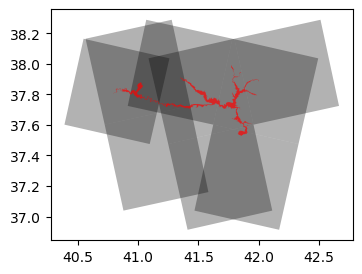

In [35]:
import matplotlib.pyplot as plt
import contextily as cx
fig, ax = plt.subplots(figsize=(6, 3))
filtered_gdf_shapefile.plot(ax=ax, alpha=0.3, color='k', linestyle='-', linewidth=0.3)
gpd.read_file(shapefile_path).plot(ax=ax, color='r', alpha=0.7)
# ax.set(xlim=[20, 50],ylim=[30, 50], xticks=[], yticks=[])
# cx.add_basemap(ax, crs='EPSG:4326', source=cx.providers.OpenTopoMap)
plt.show()

# Retrieve data from NASA Earthdata

In [ ]:
ppp = filtered_gdf_shapefile.iloc[0]['pass_number']
sss = filtered_gdf_shapefile.iloc[0]['scene_number']

In [39]:
auth = earthaccess.login()

In [48]:
data_name = 'SWOT_L2_HR_Raster_2.0'
granule_name = f"{ppp}_{sss}"
#Retrieves granule from the day we want, in this case by passing to `earthdata.search_data` function the data collection shortname, temporal bounds, and filter by wildcards
river_results = earthaccess.search_data(short_name = data_name, 
                                        granule_name = f'*{granule_name}*')

Granules found: 34


In [49]:
def create_nested_folders(data_name, granule_name, base_path):
  """
  Creates nested folders if they don't exist.

  Args:
    data_name: The name of the top-level folder.
    granule_name: The complete name of the subfolder.
    base_path: The base path where to create the folders.

  Returns:
    The full path to the granule folder.
  """

  data_path = os.path.join(base_path, data_name)
  if not os.path.exists(data_path):
    os.makedirs(data_path)

  granule_path = os.path.join(data_path, granule_name)
  if not os.path.exists(granule_path):
    os.makedirs(granule_path)

  return granule_path

In [51]:
save_path = create_nested_folders(data_name, granule_name, 'data/RASTER/')

In [52]:
save_path

'data/RASTER/SWOT_L2_HR_Raster_2.0\\178_045F'

In [53]:
earthaccess.download(river_results, save_path)

 Getting 34 granules, approx download size: 1.21 GB


QUEUEING TASKS | :   0%|          | 0/34 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/34 [00:00<?, ?it/s]

Error while downloading the file SWOT_L2_HR_Raster_100m_UTM38S_N_x_x_x_010_178_045F_20240131T082021_20240131T082042_PIC0_01.nc
Error while downloading the file SWOT_L2_HR_Raster_250m_UTM38S_N_x_x_x_011_178_045F_20240221T050526_20240221T050547_PIC0_01.nc
Error while downloading the file SWOT_L2_HR_Raster_100m_UTM38S_N_x_x_x_011_178_045F_20240221T050526_20240221T050547_PIC0_01.nc
Error while downloading the file SWOT_L2_HR_Raster_250m_UTM38S_N_x_x_x_010_178_045F_20240131T082021_20240131T082042_PIC0_01.nc
Traceback (most recent call last):
  File "c:\Users\farukgurbuz\anaconda3\envs\swot\Lib\site-packages\urllib3\connection.py", line 198, in _new_conn
    sock = connection.create_connection(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\farukgurbuz\anaconda3\envs\swot\Lib\site-packages\urllib3\util\connection.py", line 60, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

COLLECTING RESULTS | :   0%|          | 0/34 [00:00<?, ?it/s]

['data\\RASTER\\SWOT_L2_HR_Raster_2.0\\178_045F\\SWOT_L2_HR_Raster_250m_UTM38S_N_x_x_x_001_178_045F_20230727T133436_20230727T133457_PGC0_01.nc',
 'data\\RASTER\\SWOT_L2_HR_Raster_2.0\\178_045F\\SWOT_L2_HR_Raster_100m_UTM38S_N_x_x_x_001_178_045F_20230727T133436_20230727T133457_PGC0_01.nc',
 'data\\RASTER\\SWOT_L2_HR_Raster_2.0\\178_045F\\SWOT_L2_HR_Raster_250m_UTM38S_N_x_x_x_003_178_045F_20230907T070447_20230907T070508_PGC0_01.nc',
 'data\\RASTER\\SWOT_L2_HR_Raster_2.0\\178_045F\\SWOT_L2_HR_Raster_100m_UTM38S_N_x_x_x_003_178_045F_20230907T070447_20230907T070508_PGC0_01.nc',
 'data\\RASTER\\SWOT_L2_HR_Raster_2.0\\178_045F\\SWOT_L2_HR_Raster_250m_UTM38S_N_x_x_x_004_178_045F_20230928T034951_20230928T035012_PGC0_01.nc',
 'data\\RASTER\\SWOT_L2_HR_Raster_2.0\\178_045F\\SWOT_L2_HR_Raster_100m_UTM38S_N_x_x_x_004_178_045F_20230928T034951_20230928T035012_PGC0_01.nc',
 'data\\RASTER\\SWOT_L2_HR_Raster_2.0\\178_045F\\SWOT_L2_HR_Raster_250m_UTM38S_N_x_x_x_005_178_045F_20231019T003455_20231019T00351

## Process Data

In [54]:
data_path = os.listdir(save_path)[0]

In [55]:
data_path

'SWOT_L2_HR_Raster_100m_UTM38S_N_x_x_x_001_178_045F_20230727T133436_20230727T133457_PGC0_01.nc'

In [27]:
# import ee
import geemap
import ipywidgets as widgets
from ipyleaflet import WidgetControl
Map = geemap.Map()
Map.points = []

# Add an output widget to the map
output_widget = widgets.Output(layout={'border': '1px solid black'})
output_control = WidgetControl(widget=output_widget, position='bottomleft')
Map.add_control(output_control)

# Capture user interaction with the map
def handle_interaction(**kwargs):
    latlon = kwargs.get('coordinates')
    if kwargs.get('type') == 'click':
        Map.default_style = {'cursor': 'wait'}
        # xy = ee.Geometry.Point(latlon[::-1])

        with output_widget:
            output_widget.clear_output()
            print(latlon)
        Map.points.append(latlon)
    Map.default_style = {'cursor': 'pointer'}

Map.on_interaction(handle_interaction)

Map

Map(center=[0, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(childr…

In [33]:
last_point = Map.points[-1]

In [37]:
#Retrieves granule from the day we want, in this case by passing to `earthdata.search_data` function the data collection shortname, temporal bounds, and filter by wildcards
river_results = earthaccess.search_data(short_name = 'SWOT_L2_HR_Raster_2.0', 
                                        #temporal = ('2024-02-01 00:00:00', '2024-02-29 23:59:59'), # can also specify by time
                                        granule_name = '*100m*',
                                        bounding_box=(last_point[0]-0.001, last_point[1]-0.001, last_point[0]+0.001,last_point[1]+0.001)) 

Granules found: 38


In [39]:
river_results[0]

Collection: {'Version': '2.0', 'ShortName': 'SWOT_L2_HR_Raster_2.0'}
Spatial coverage: {'HorizontalSpatialDomain': {'Geometry': {'BoundingRectangles': [{'WestBoundingCoordinate': -180, 'SouthBoundingCoordinate': -90, 'EastBoundingCoordinate': 180, 'NorthBoundingCoordinate': 90}]}, 'Track': {'Cycle': 1, 'Passes': [{'Pass': 222, 'Tiles': ['040L', '041L', '042L', '043L', '040R', '041R', '042R', '043R']}]}}}
Temporal coverage: {'RangeDateTime': {'EndingDateTime': '2023-07-29T03:10:37.157Z', 'BeginningDateTime': '2023-07-29T03:10:16.035Z'}}
Size(MB): 66.32471752166748
Data: ['https://archive.swot.podaac.earthdata.nasa.gov/podaac-swot-ops-cumulus-protected/SWOT_L2_HR_Raster_2.0/SWOT_L2_HR_Raster_100m_UTM60V_N_x_x_x_001_222_021F_20230729T031016_20230729T031037_PGC0_01.nc']

## Custom Functions

In [107]:
import netCDF4
import numpy as np

In [108]:
dataset = netCDF4.Dataset('data\RASTER\SWOT_L2_HR_Raster_100m_UTM01W_N_x_x_x_016_267_137F_20240607T174029_20240607T174040_PIC0_01.nc', 'r')

In [112]:
dataset.variables

{'crs': <class 'netCDF4._netCDF4.Variable'>
 |S1 crs()
     _FillValue: b'*'
     long_name: CRS Definition
     grid_mapping_name: transverse_mercator
     projected_crs_name: WGS 84 / UTM zone 1N
     geographic_crs_name: WGS 84
     reference_ellipsoid_name: WGS 84
     horizontal_datum_name: WGS_1984
     prime_meridian_name: Greenwich
     false_easting: 500000.0
     false_northing: 0.0
     longitude_of_central_meridian: -177.0
     longitude_of_prime_meridian: 0.0
     latitude_of_projection_origin: 0.0
     scale_factor_at_central_meridian: 0.9996
     semi_major_axis: 6378137.0
     inverse_flattening: 298.257223563
     crs_wkt: PROJCS["WGS 84 / UTM zone 1N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",

In [ ]:
a = gdf.loc[:100].copy()
# Apply the function to each row in the 'Description' column and assign the result to a new column using .loc
a.loc[:, 'Parsed_HTML'] = a['Description'].apply(extract_links_from_html)
# Create a copy of the GeoDataFrame
a_copy = a.copy()

# Drop the 'Description' column from the copied DataFrame
a_copy.drop(columns=['Description'], inplace=True)


In [ ]:
a_copy.geometry[1]

In [ ]:
gdf.loc[gdf.geometry.type =='LineString', 'type'] = 'swath'
gdf.loc[gdf.geometry.type =='Polygon', 'type'] = 'tile'

In [ ]:
gdf.loc[gdf.geometry.type =='Polygon', 'area'] = gdf.loc[gdf.geometry.type =='Polygon'].geometry.area

In [ ]:
gdf.geometry[0].area

In [ ]:
gdf.loc[(gdf['area']<1.4)&(gdf['area']>0.4)]

## Supplementary Code

In [ ]:
# # Option 1: Use a bounding box
# min_lon, min_lat, max_lon, max_lat = [26, 36, 45, 42]
# bounding_box = box(min_lon, min_lat, max_lon, max_lat)
# filtered_gdf_bbox = tools.filter_geodataframe(gdf, bbox=[min_lon, min_lat, max_lon, max_lat])

# Option 2: Use a shapefile path
shapefile_path = 'data/Turkiye_Border.shp'
filtered_gdf_shapefile = tools.filter_geodataframe(gdf, shapefile_path=shapefile_path)
filtered_gdf_shapefile.loc[:, 'Parsed_HTML'] = filtered_gdf_shapefile['description'].apply(tools.extract_links_from_html)
filtered_gdf_shapefile.drop(columns=['description'], inplace=True)